## 베이직반 통계 1차시 복습퀴즈 

### Baseline (주어진 코드)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import platform

pd.set_option('display.float_format',"{:.2f}".format)

# OS에 따라 다른 폰트 지정
if platform.system() == 'Darwin':   # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
elif platform.system() == 'Windows':  # Windows
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:  # Linux (예: Colab, Ubuntu)
    plt.rcParams['font.family'] = 'NanumGothic'

In [4]:
folder_path = "articles_hm.csv" #########--------------------- 자기 경로로 수정하기!
article_df = pd.read_csv("articles_hm.csv")
customer_df = pd.read_csv("customer_hm.csv")
transaction_df = pd.read_csv("transactions_hm.csv")    #folder_path+?

In [5]:
whole_df = pd.merge(
    pd.merge(
        transaction_df,
        customer_df,
        on = 'customer_id'
    ),
    article_df,
    on ='article_id'
)
df = whole_df[['t_dat','customer_id','Active','age','section_no','section_name','index_group_no','index_group_name','product_type_no','product_type_name','price']].copy()
df['price'] = df['price']*1000

In [6]:
df.shape

(812931, 11)

In [7]:
df.describe()

,Active,age,section_no,index_group_no,product_type_no,price
count,812931.00,812931.00,812931.00,812931.00,812931.00,812931.00
mean,0.43,36.36,36.61,2.35,245.69,27.77
std,0.49,13.01,23.01,4.66,67.75,19.32
min,0.00,16.00,2.00,1.00,-1.00,0.24
25%,0.00,26.00,15.00,1.00,253.00,15.24
50%,0.00,32.00,47.00,1.00,264.00,25.41
75%,1.00,48.00,60.00,2.00,273.00,33.88
max,1.00,99.00,97.00,26.00,532.00,506.78


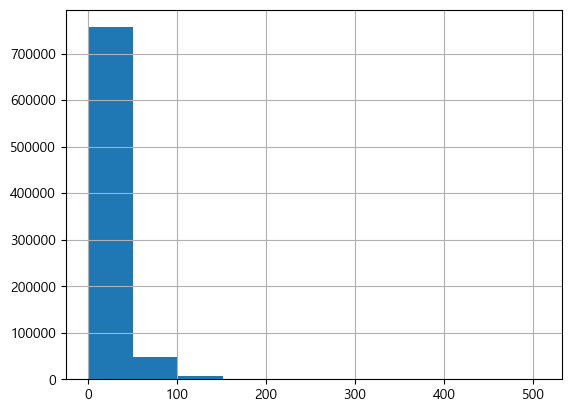

In [8]:
df['price'].hist()
plt.show()

In [9]:
area_data = df['price'].dropna().values
q_1 = np.percentile(df['price'], q=25)
q_3 = np.percentile(df['price'], q=75)
q_3.round(2)

np.float64(33.88)

In [10]:
iqr = q_3 - q_1
q_1,q_3,iqr

(np.float64(15.237288),
 np.float64(33.881356000000004),
 np.float64(18.644068000000004))

In [11]:
lower_whisker = q_1 - iqr*1.5
upper_whisker = q_3 + iqr*1.5
df.loc[(df['price']<lower_whisker)|(df['price']>upper_whisker)]

,t_dat,customer_id,Active,age,section_no,section_name,index_group_no,index_group_name,product_type_no,product_type_name,price
13,2019-12-16,60ddf2a3025c0d258e6e36a49ef4552dc1387ef9101ef0...,0,27,15,Womens Everyday Collection,1,Ladieswear,265,Dress,152.53
36,2019-11-05,af009bb3c25a04b40141dccee0dbddae745f8605f2e560...,1,27,57,Ladies Denim,2,Divided,272,Trousers,84.73
81,2019-09-12,bb662fafda64d7623825257ef73b8f726b93d48948fd63...,0,34,8,Mama,1,Ladieswear,272,Trousers,67.78
87,2019-11-13,a6ccf7f0366a494bab9b92063066a060d6dbb20fd29d35...,1,29,64,Womens Shoes,1,Ladieswear,90,Pumps,101.68
151,2019-09-25,111a15bce93afd74f15e28b58b3c353cb6df2bf3f9d773...,1,67,57,Ladies Denim,2,Divided,272,Trousers,84.73
...,...,...,...,...,...,...,...,...,...,...,...
812865,2019-12-06,8ad59d85354cbb6be1dd27fb6ea399674002e7fd7f1bdd...,1,52,23,Men Suits & Tailoring,3,Menswear,264,Blazer,101.68
812869,2019-04-22,607bde8769e0d7ea2c19e025db2eecfdc68620312c73c2...,0,25,57,Ladies Denim,2,Divided,262,Jacket,67.78
812895,2019-03-28,5b712ec2c675ca9c4a2949795aed3c0ff5a35c845c9b22...,1,27,57,Ladies Denim,2,Divided,272,Trousers,67.78
812903,2019-03-04,025c705b7d9f959782e5b4e62ddfde1950335aec4e7f65...,1,23,19,Womens Jackets,1,Ladieswear,262,Jacket,101.68


In [12]:
s = np.std(df['age'],ddof=1)
s.round(2)

np.float64(13.01)

In [13]:
df['price'].median()

np.float64(25.40678)

In [14]:
df['price'].mean()

np.float64(27.774372387550727)